<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguaje Natural

## Taller #12: Análisis de sentimiento
`Fecha de entrega: Mayo 27, 2021`

`Nombre: Maria Paula Silva.` 

`Código: 616202030`

In [2]:
! pip install tweepy

In [3]:
import pandas as pd 
import tweepy

##Obtener los datos de Twitter

In [4]:
# Leer llaves
keys = pd.read_csv("/content/keys.csv", header=None)
keys = dict(zip(keys[0],keys[1]))

In [5]:
# Autorizar a través API
auth = tweepy.OAuthHandler(keys['api_key'], keys['api_secret_key'])
auth.set_access_token(keys['access_token'], keys['access_token_secret'])
api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
tweets = tweepy.Cursor(api.search,
                       q=['caida del bitcoin -RT'],
                       lang='es',
                       geocode=f'4.7110,-74.0721,100km',
                       tweet_mode='extended',
                       include_rts=False).items(250)

In [7]:
# Objeto generador
t = [tweet for tweet in tweets]

In [8]:
t_processed = []

for tweet in t:
    temp = []
    temp.append(tweet.full_text)
    temp.append(tweet.created_at)
    temp.append("Bogotá")
    temp.append(tweet.user.location)
    temp.append(tweet.id)
    temp.append(f"https://twitter.com/i/web/status/{tweet.id}")
    
    t_processed.append(temp)

In [9]:
data = pd.DataFrame(t_processed)
data.columns = ['tweet', 'date', 'city', 'user_location', 'id', 'link']
data.head()

,tweet,date,city,user_location,id,link
0,Esta ultima caída del #Bitcoin fue la mas impo...,2021-05-26 15:34:17,Bogotá,Bogota,1397576834124972034,https://twitter.com/i/web/status/1397576834124...
1,@Techconcatalina Adivinen quien quien compro c...,2021-05-24 21:00:36,Bogotá,Bélgica,1396934179078692870,https://twitter.com/i/web/status/1396934179078...
2,@sinisterra111 @stefasegura2 Y no llego. Ando ...,2021-05-24 19:12:58,Bogotá,"Buenaventura, Valle del Cauca",1396907090044665856,https://twitter.com/i/web/status/1396907090044...
3,"El bitcóin llegó a caer 13% el domingo, despué...",2021-05-23 22:39:58,Bogotá,"Bogotá, Colombia",1396596796428890115,https://twitter.com/i/web/status/1396596796428...
4,Ripio de Argentina compra USD 10 millones en b...,2021-05-23 18:03:37,Bogotá,Tunja / Colombia,1396527252989353987,https://twitter.com/i/web/status/1396527252989...


##PUNTO 1: Hacer análisis de sentimiento

In [10]:
! pip install vaderSentiment
! pip install textblob
! pip install flair

     |████████████████████████████████| 133kB 6.3MB/s 
     |████████████████████████████████| 286kB 6.5MB/s 
     |████████████████████████████████| 19.7MB 1.3MB/s 
     |████████████████████████████████| 983kB 30.2MB/s 
     |████████████████████████████████| 2.3MB 36.9MB/s 
     |████████████████████████████████| 798kB 36.0MB/s 
     |████████████████████████████████| 71kB 8.2MB/s 
     |████████████████████████████████| 776.8MB 22kB/s 
     |████████████████████████████████| 1.2MB 28.5MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 3.3MB 19.1MB/s 
     |████████████████████████████████| 901kB 42.5MB/s 
  Created wheel for gdown: filename=gdown-3.12.2-cp37-none-any.whl size=9693 sha256=d2a417e2363b0b77ecd4121596a61d25af1afbeaf80bc6b5d072d2de16be2f39
  Stored in directory: /root/.cache/pip/wheels/81/d0/d7/d9983facc6f2775411803e0e2d30ebf98efbf2fc6e57701e09
Succes

In [13]:
from flair.models import TextClassifier
from flair.data import Sentence

In [15]:
classifier = TextClassifier.load('en-sentiment')

2021-05-27 22:59:47,928 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmp__sa0mgm


100%|██████████| 265512723/265512723 [00:13<00:00, 19347622.38B/s]

2021-05-27 23:00:02,015 copying /tmp/tmp__sa0mgm to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2021-05-27 23:00:03,272 removing temp file /tmp/tmp__sa0mgm
2021-05-27 23:00:04,009 loading file /root/.flair/models/sentiment-en-mix-distillbert_4.pt


In [16]:
def sent_flair(texto):
    sentence = Sentence(texto)
    classifier.predict(sentence)
    result = sentence.labels[0]
    label = result.value
    score = result.score
    if label == 'POSITIVE':
        return score
    if label == 'NEGATIVE':
        return -1 * score
    return score

data['sent_flair'] = data['tweet'].apply(lambda valor: sent_flair(valor))
data.head()

,tweet,date,city,user_location,id,link,sent_flair
0,Esta ultima caída del #Bitcoin fue la mas impo...,2021-05-26 15:34:17,Bogotá,Bogota,1397576834124972034,https://twitter.com/i/web/status/1397576834124...,-0.869037
1,@Techconcatalina Adivinen quien quien compro c...,2021-05-24 21:00:36,Bogotá,Bélgica,1396934179078692870,https://twitter.com/i/web/status/1396934179078...,0.595779
2,@sinisterra111 @stefasegura2 Y no llego. Ando ...,2021-05-24 19:12:58,Bogotá,"Buenaventura, Valle del Cauca",1396907090044665856,https://twitter.com/i/web/status/1396907090044...,-0.869365
3,"El bitcóin llegó a caer 13% el domingo, despué...",2021-05-23 22:39:58,Bogotá,"Bogotá, Colombia",1396596796428890115,https://twitter.com/i/web/status/1396596796428...,-0.690133
4,Ripio de Argentina compra USD 10 millones en b...,2021-05-23 18:03:37,Bogotá,Tunja / Colombia,1396527252989353987,https://twitter.com/i/web/status/1396527252989...,-0.947696


##PUNTO 2: ¿Cuál es el tuit más positivo y más negativo?

In [19]:
pd.set_option('display.max_colwidth', None)
data[['tweet', 'sent_flair']].sort_values('sent_flair')


,tweet,sent_flair
7,La aparatosa caída del bitcóin: ¿qué implicaciones tiene? ¿Es un riesgo para el orden económico mundial? En Diario Criterio les explicamos.\nhttps://t.co/aaIBuYS0Iw,-0.983372
4,Ripio de Argentina compra USD 10 millones en bitcoin y ether tras caída del mercado https://t.co/0V2aIJEhNc https://t.co/De6neMtiyd,-0.947696
2,@sinisterra111 @stefasegura2 Y no llego. Ando caída como la venta del coco y el precio bitcoin jajaja.😭😭😭😂😂😂,-0.869365
0,"Esta ultima caída del #Bitcoin fue la mas importante de la historia , lógico medida en dólares https://t.co/8hqwSz1abZ",-0.869037
3,"El bitcóin llegó a caer 13% el domingo, después de que la criptomoneda más grande y conocida del mundo sufrió otra ola de ventas que la llevó a acumular una caída de casi 50% desde su máximo en el año https://t.co/tq5O15AMbD",-0.690133
1,@Techconcatalina Adivinen quien quien compro como loco la caida y ahora quiere impulsar precio para luego vender... Hasta qu ela gente no aprenda del ecositema #bitcoin y lo que es cómo tecnologia.. Él le quotara dinero a mas de uno.,0.595779
6,"2⃣ @ideasdemasterm El tema hoy es la caida del Bitcoin y esta arrastrando a las demas cripto monedas, esto me lleva nuevamente a la pregunta si hoy día vale la pena invertir en Criptomonedas",0.887935
5,"El valor de la 'moneda del futuro' se desplomó hasta un 36% en los últimos días. Con él se hundieron los valores netos de 12 cripto multimillonarios. ¿Por qué a pesar de la caída, todavía tienen para festejar?\n\nhttps://t.co/dDKnPlUpWG",0.937685
8,"#BTC \n\nSí es tu primera caída fuerte con Bitcoin y estas para largo plazo:\n\n1) No desesperes, aprovecha la situación para aprender, estudiar y probar las alternativas del mercado.\n2) Acumular en estos momentos.\n3) Revisar las emociones y replantear estrategias. https://t.co/YsxWTxXG3t",0.995909


El tuit más negativo según la red neuronal, es el número 7 que dice: "La aparatosa caída del bitcóin: ¿qué implicaciones tiene? ¿Es un riesgo para el orden económico mundial? En Diario Criterio les explicamos.\nhttps://t.co/aaIBuYS0Iw"

In [20]:
pd.set_option('display.max_colwidth', None)
data[['tweet', 'sent_flair']].sort_values('sent_flair').tail()


,tweet,sent_flair
3,"El bitcóin llegó a caer 13% el domingo, después de que la criptomoneda más grande y conocida del mundo sufrió otra ola de ventas que la llevó a acumular una caída de casi 50% desde su máximo en el año https://t.co/tq5O15AMbD",-0.690133
1,@Techconcatalina Adivinen quien quien compro como loco la caida y ahora quiere impulsar precio para luego vender... Hasta qu ela gente no aprenda del ecositema #bitcoin y lo que es cómo tecnologia.. Él le quotara dinero a mas de uno.,0.595779
6,"2⃣ @ideasdemasterm El tema hoy es la caida del Bitcoin y esta arrastrando a las demas cripto monedas, esto me lleva nuevamente a la pregunta si hoy día vale la pena invertir en Criptomonedas",0.887935
5,"El valor de la 'moneda del futuro' se desplomó hasta un 36% en los últimos días. Con él se hundieron los valores netos de 12 cripto multimillonarios. ¿Por qué a pesar de la caída, todavía tienen para festejar?\n\nhttps://t.co/dDKnPlUpWG",0.937685
8,"#BTC \n\nSí es tu primera caída fuerte con Bitcoin y estas para largo plazo:\n\n1) No desesperes, aprovecha la situación para aprender, estudiar y probar las alternativas del mercado.\n2) Acumular en estos momentos.\n3) Revisar las emociones y replantear estrategias. https://t.co/YsxWTxXG3t",0.995909


El tuit más positivo según la red neuronal, es el número 8 que dice: "#BTC \n\nSí es tu primera caída fuerte con Bitcoin y estas para largo plazo:\n\n1) No desesperes, aprovecha la situación para aprender, estudiar y probar las alternativas del mercado.\n2) Acumular en estos momentos.\n3) Revisar las emociones y replantear estrategias. https://t.co/YsxWTxXG3t"

##PUNTO 3: Una visualización sobre sus datos

In [ ]:
! pip install wordcloud

In [ ]:
import numpy as np

from wordcloud import WordCloud, ImageColorGenerator

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display
from nltk.corpus import stopwords

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")
chachedWords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop = set(stopwords.words('english'))

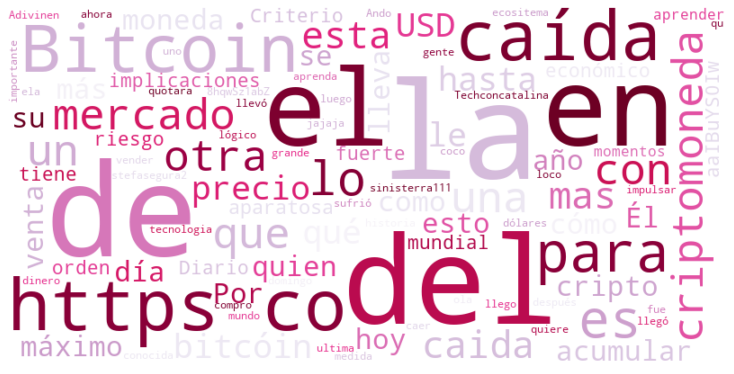

In [ ]:
palabras = data.tweet.str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="PuRd",
                      stopwords=stop, collocations=True).generate(palabras) 
                      
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

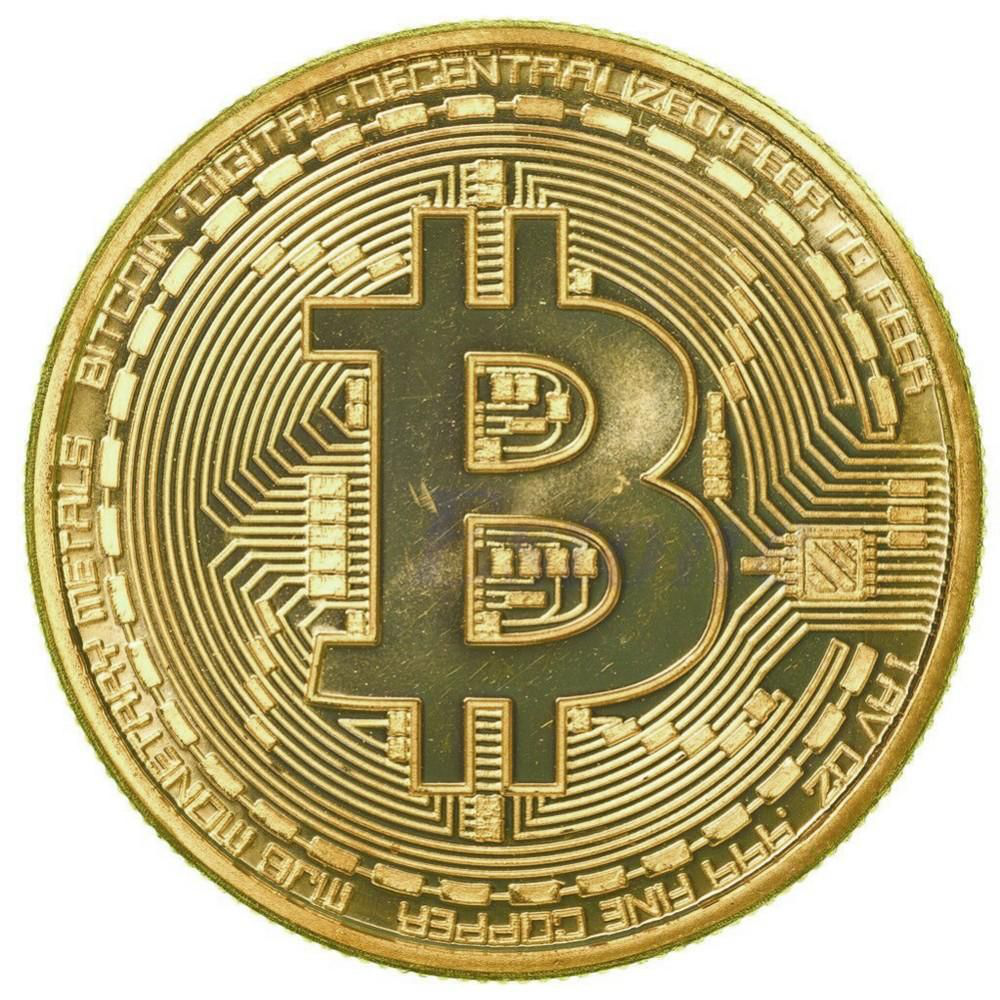

In [ ]:
img = PIL.Image.open("/content/bitcoin.jpg")
display(img)

In [ ]:
mask = np.array(img)
mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

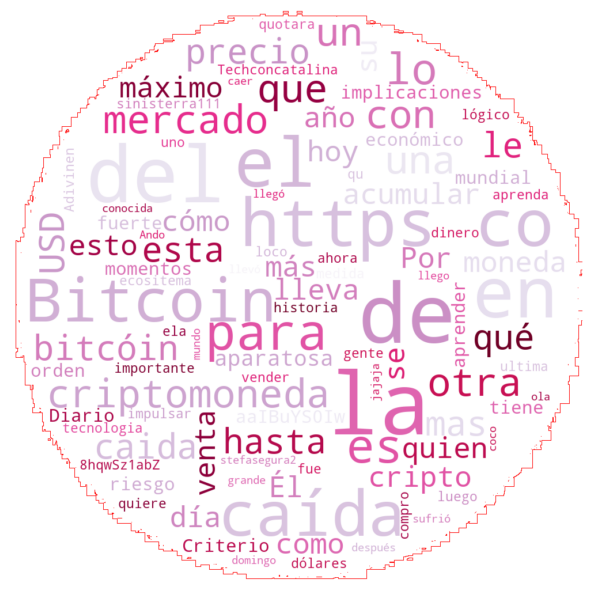

In [ ]:
palabras = data.tweet.str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="PuRd",
                      stopwords=stop, collocations=True,
                      mask=mask, contour_width=0.5, contour_color='red').generate(palabras)


plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()